In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [120]:
housingDataImputed = pd.read_csv('./imputeImpl2a_cat_housingData.csv',index_col = 0, na_filter = False)

numeric_features=list(housingDataImputed.select_dtypes(include=[np.number]).columns.values)
cat_features=list(housingDataImputed.select_dtypes(exclude=[np.number]).columns.values)
numeric_features.remove('SalePrice')
numeric_features.remove('PID')
X_vars = numeric_features 
Y_var = ['SalePrice']

X=housingDataImputed[X_vars]
y=np.log(housingDataImputed[Y_var])

XTrain,XTest,ytrain,ytest = train_test_split(X,y)
numeric_features

['GrLivArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'OldHouse',
 'BuiltInGarage',
 'central_air',
 'GoodKitchen',
 'WalkoutBasement',
 'BasementQuality',
 'StreetType',
 'LandContourHLS',
 'PubUtilities',
 'GreatLocation1',
 'GreatLocation2',
 'GoodRoofMat',
 'GoodExterior1',
 'GoodExterior2',
 'GoodExteriorQual',
 'LivableBasement1',
 'LivableBasement2',
 'GasHeating',
 'HeatingQuality',
 'AirConditioning',
 'FunctionDeduction',
 'FireplaceQuality',
 'GarageFinished',
 'GoodGarage',
 'GoodPool

In [16]:
def check_empty_vals():
    cols=housingDataImputed.columns
    for col in cols:
        null_count=pd.isnull(housingDataImputed[col]).sum()
        if null_count>0:
            print(col,null_count)
        
        
check_empty_vals()

In [63]:
housingDataImputed['MSSubClass'].unique()

array([ 30, 120,  70,  60,  85,  20, 180,  80, 160,  50,  90,  75,  45,
        40, 190, 150])

In [101]:
lasso=Lasso()
lasso.set_params(alpha=0.0001, max_iter=10000, normalize=True)
lasso.fit(XTrain,ytrain)
lassoCoef = pd.Series(lasso.coef_, index=numeric_features)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
features_to_keep_lasso=sortedCoefs[sortedCoefs!=0].index
features_to_keep_lasso

Index(['GreatLocation2', 'OverallQual', 'AirConditioning', 'LandContourHLS',
       'GoodExteriorQual', 'OverallCond', 'HeatingQuality', 'GarageCars',
       'Fireplaces', 'KitchenAbvGr', 'BuiltInGarage', 'BsmtFullBath',
       'BasementQuality', 'FireplaceQuality', 'FunctionDeduction',
       'LivableBasement1', 'GoodPool', 'TotRmsAbvGrd', 'GarageFinished',
       'YearBuilt', 'YrSold', 'GoodGarage', 'YearRemodAdd', 'LotFrontage',
       'MSSubClass', 'GrLivArea', 'ScreenPorch', 'TotalBsmtSF', 'BsmtFinSF1',
       'GarageArea', '3SsnPorch', 'BsmtFinSF2', 'WoodDeckSF', 'EnclosedPorch',
       'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'LotArea'],
      dtype='object')

Text(0.5, 1.0, 'Change of Lasso Intercept Varying Alpha')

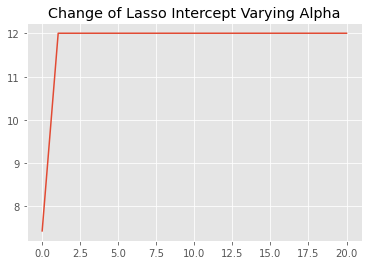

In [117]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,20,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True, max_iter=100000)  
    lasso.fit(XTrain, ytrain)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(XTrain, ytrain))
plt.plot(alphaRange, intercepts)
plt.title('Change of Lasso Intercept Varying Alpha')

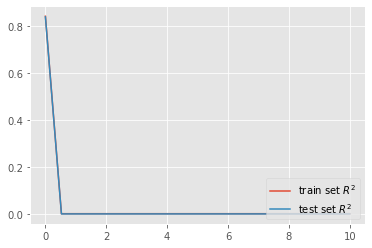

In [118]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(0.001,10,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, max_iter=10000)  
    lasso.fit(XTrain, ytrain)
    train_R2.append(lasso.score(XTrain, ytrain))
    test_R2.append(lasso.score(XTest, ytest))
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [100]:
alphas = np.linspace(0.0001,10,100)
params2 = [{'alpha': alphas}]
grid2=GridSearchCV(estimator=lasso,param_grid=params2, return_train_score=True)
grid2.fit(XTrain,ytrain)
print(grid2.best_params_)
print(grid2.score(XTest,ytest))

{'alpha': 0.0001}
0.9113686507891585


In [112]:
housingDataImputed

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DesirableNeighborhood
0,909176150,856,126000,30,RL,58.77,7890,Pave,Reg,Lvl,...,0,NA,NA,0,0,3,2010,WD,Normal,0
1,905476230,1049,139500,120,RL,42.00,4235,Pave,Reg,Lvl,...,0,NA,NA,0,0,2,2009,WD,Normal,0
3,535377150,1039,114000,70,RL,80.00,8146,Pave,Reg,Lvl,...,0,NA,NA,0,0,5,2009,WD,Normal,0
4,534177230,1665,227000,60,RL,70.00,8400,Pave,Reg,Lvl,...,0,NA,NA,0,0,11,2009,WD,Normal,0
5,908128060,1922,198500,85,RL,64.00,7301,Pave,Reg,Lvl,...,0,NA,NA,0,0,7,2009,ConLD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,55.95,8854,Pave,Reg,Lvl,...,0,NA,NA,0,0,5,2009,WD,Normal,0
2576,905402060,1733,139600,20,RL,65.49,13680,Pave,IR1,Lvl,...,0,NA,NA,0,0,6,2009,WD,Normal,0
2577,909275030,2002,145000,90,RH,82.00,6270,Pave,Reg,HLS,...,0,NA,NA,0,0,8,2007,WD,Normal,0
2578,907192040,1842,217500,60,RL,69.98,8826,Pave,Reg,Lvl,...,0,NA,NA,0,0,7,2007,WD,Normal,0


In [117]:
housingDataImputed.corr().to_csv("cat_cor.csv")

In [8]:
#"OverallQual","DesirableNeighborhood","GarageArea","GrLivArea","TotalBsmtSF",'BuiltInGarage',"GoodKitchen"
# "OverallQual","DesirableNeighborhood","GarageArea","GrLivArea","TotalBsmtSF",'BuiltInGarage',"GoodKitchen","WalkoutBasement","BasementQuality","MasVnrArea"
vif_numeric_features=["OverallQual","GarageArea","GrLivArea","TotalBsmtSF",
                      'BuiltInGarage',"GoodKitchen","WalkoutBasement","BasementQuality","TotRmsAbvGrd","HeatingQuality"]

Y_var = ['SalePrice']

X_vif=housingDataImputed[vif_numeric_features]
y_vif=np.log(housingDataImputed[Y_var])

XvTrain,XvTest,yvtrain,yvtest = train_test_split(X_vif,y_vif)
ols=LinearRegression()
ols.fit(XvTrain,yvtrain)
print(ols.score(XvTrain,yvtrain))
print(ols.score(XvTest,yvtest))

0.8518065085420162
0.8331457575734957


In [32]:
vif2_num_cat_features=["OverallQual","GarageArea","GrLivArea","TotalBsmtSF","3SsnPorch","GoodGarage","GoodRoofMat","LandContourHLS","GreatLocation1","GoodExterior1","ScreenPorch",
                       "GoodExterior2","GreatLocation2","BsmtHalfBath","LivableBasement2","MiscVal","EnclosedPorch",
                       "MiscFeature","GoodExteriorQual","GoodPool","PoolArea","GarageFinished","OpenPorchSF",
                       "WoodDeckSF","MasVnrArea","FireplaceQuality","LivableBasement1",
                       "HalfBath","LotArea","Fireplaces","BsmtFullBath","HeatingQuality","MSSubClass"]
X_vif2=housingDataImputed[vif2_num_cat_features]
y_vif2=np.log(housingDataImputed[Y_var])

Xv2Train,Xv2Test,yv2train,yv2test = train_test_split(X_vif2,y_vif2)
ols.fit(Xv2Train,yv2train)
print(ols.score(Xv2Train,yv2train))
print(ols.score(Xv2Test,yv2test))

0.87285664530157
0.8617206295538655


In [102]:
X3=housingDataImputed[features_to_keep_lasso]
y3=np.log(housingDataImputed[Y_var])

Xv3Train,Xv3Test,yv3train,yv3test = train_test_split(X3,y3)
ols.fit(Xv3Train,yv3train)
print(ols.score(Xv3Train,yv3train))
print(ols.score(Xv3Test,yv3test))

0.9160312219179803
0.8852140989312213


In [103]:
import statsmodels.api as sm
from statsmodels.api import OLS
features = sm.add_constant(X3)
ols_sm   = OLS(y3, features)
model    = ols_sm.fit()
model.pvalues[model.pvalues <0.05].index
pvalue_significant_features=model.pvalues[model.pvalues <0.05].index
pvalue_significant_features

Index(['const', 'GreatLocation2', 'OverallQual', 'AirConditioning',
       'LandContourHLS', 'GoodExteriorQual', 'OverallCond', 'HeatingQuality',
       'GarageCars', 'Fireplaces', 'KitchenAbvGr', 'BsmtFullBath',
       'BasementQuality', 'FireplaceQuality', 'FunctionDeduction',
       'LivableBasement1', 'TotRmsAbvGrd', 'YearBuilt', 'YrSold',
       'YearRemodAdd', 'LotFrontage', 'MSSubClass', 'GrLivArea', 'ScreenPorch',
       'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'BsmtFinSF2', 'WoodDeckSF',
       'EnclosedPorch', '1stFlrSF', 'LotArea'],
      dtype='object')

In [116]:
pvalue_significant_features
X4=housingDataImputed[['GreatLocation2', 'OverallQual', 'AirConditioning',
       'LandContourHLS', 'GoodExteriorQual', 'OverallCond', 'HeatingQuality',
       'GarageCars', 'Fireplaces', 'KitchenAbvGr', 'BsmtFullBath',
       'BasementQuality', 'FireplaceQuality', 'FunctionDeduction',
       'LivableBasement1', 'TotRmsAbvGrd', 'YearBuilt', 'YrSold',
       'YearRemodAdd', 'LotFrontage', 'MSSubClass', 'GrLivArea', 'ScreenPorch',
       'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'BsmtFinSF2', 'WoodDeckSF',
       'EnclosedPorch', '1stFlrSF', 'LotArea']]
y4=np.log(housingDataImputed[Y_var])

Xv4Train,Xv4Test,yv4train,yv4test = train_test_split(X4,y4)
ols.fit(Xv4Train,yv4train)
print(ols.score(Xv4Train,yv4train))
print(ols.score(Xv4Test,yv4test))

0.9058247616639769
0.9130230092186533
